In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/월별 주야별 교통사고 통계.csv")
#기본 정보 확인
df.head()
# 주간, 야간 중 교통 사고가 많이 일어나는 시기는?

,발생월,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,주,8682,98,2209,9440,759
1,1,야,5798,92,1539,6349,530
2,2,주,8056,95,2149,8710,710
3,2,야,5228,86,1419,5553,500
4,3,주,10393,109,2600,11132,880


In [10]:
df.head()

,발생월,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,주,8682,98,2209,9440,759
1,1,야,5798,92,1539,6349,530
2,2,주,8056,95,2149,8710,710
3,2,야,5228,86,1419,5553,500
4,3,주,10393,109,2600,11132,880


In [9]:
df.describe()

,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,6.500000,8262.333333,106.291667,2207.875000,8815.375000,801.708333
std,3.526299,2463.742464,20.200041,655.509713,2746.312323,251.113430
min,1.000000,5228.000000,68.000000,1419.000000,5553.000000,467.000000
25%,3.750000,5919.250000,91.250000,1607.000000,6273.500000,592.000000
50%,6.500000,7356.500000,106.000000,1981.500000,7864.500000,723.500000
75%,9.250000,10725.750000,119.500000,2818.000000,11566.250000,1083.750000
max,12.000000,11668.000000,141.000000,3186.000000,12618.000000,1178.000000


In [14]:
# 주간/야간 별 전체 사고 건수 비교
day_night_total = df.groupby('주야')['사고건수'].sum()
print(day_night_total)

주야
야     71809
주    126487
Name: 사고건수, dtype: int64


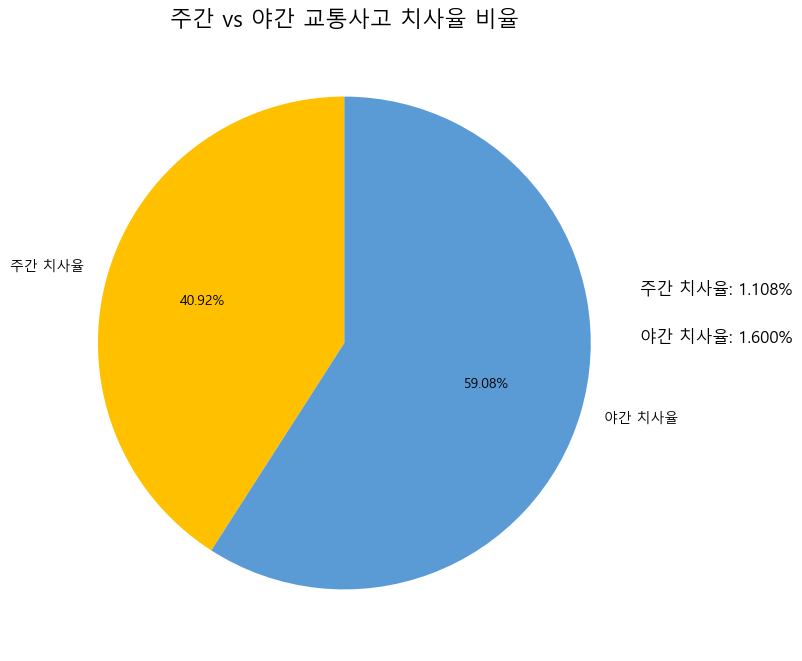

In [122]:
day_data = df[df['주야'] == '주']
night_data = df[df['주야'] == '야']

# 주간 전체 사고건수 및 사망자수
total_day_accidents = day_data['사고건수'].sum()
total_day_fatalities = day_data['사망자수'].sum()

# 야간 전체 사고건수 및 사망자수
total_night_accidents = night_data['사고건수'].sum()
total_night_fatalities = night_data['사망자수'].sum()

# 주간/야간 치사율 계산 (사고 100건당 사망자 수)
day_fatality_rate = (total_day_fatalities / total_day_accidents) * 100
night_fatality_rate = (total_night_fatalities / total_night_accidents) * 100


plt.figure(figsize=(8, 8))
plt.pie([day_fatality_rate, night_fatality_rate], labels=['주간 치사율', '야간 치사율'], colors=['#ffc000', '#5b9bd5'],
        autopct='%.2f%%', startangle=90)
plt.title('주간 vs 야간 교통사고 치사율 비율', fontsize=16)

# 치사율 수치 텍스트 추가
plt.text(1.2, 0.2, f"주간 치사율: {day_fatality_rate:.3f}%", fontsize=12)
plt.text(1.2, 0.0, f"야간 치사율: {night_fatality_rate:.3f}%", fontsize=12)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3184\3021734444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.barplot(x=day_night_total.index, y=day_night_total.values, palette=['darkblue', 'orange'])


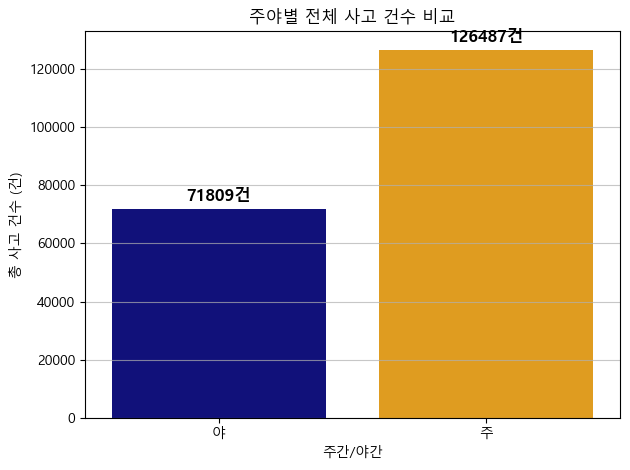

In [75]:
# [분석 1]주간, 야간 중 교통 사고가 많이 일어나는 시기는?
# plt.figure(figsize=(10, 7))
# x축에는 '주야', y축에는 '사고건수'
axes = sns.barplot(x=day_night_total.index, y=day_night_total.values, palette=['darkblue', 'orange'])

# 그래프 제목 및 라벨 설정
plt.title('주야별 전체 사고 건수 비교')
plt.xlabel('주간/야간')
plt.ylabel('총 사고 건수 (건)')

plt.grid(axis='y', alpha=0.7)


# ax.bar_label을 사용한 간단한 값 표시
# fmt='%.0f'는 정수로 표현하라는 의미입니다.
axes.bar_label(axes.containers[0], fmt='%.0f건', fontsize=12, fontweight='bold', padding=3)
axes.bar_label(axes.containers[1], fmt='%.0f건', fontsize=12, fontweight='bold', padding=3)

plt.tight_layout()
plt.show()

In [15]:
# 주간/야간 별 전체 사망 건수 비교
day_night_total = df.groupby('주야')['사망자수'].sum()
print(day_night_total)

주야
야    1149
주    1402
Name: 사망자수, dtype: int64


In [19]:
day_night_stats = df.groupby('주야')[['사고건수', '사망자수']].sum()  # 주간/야간 별로 사고건수와 사망자수 집계
day_night_stats['사고대비 사망률(%)'] = (day_night_stats['사망자수'] / day_night_stats['사고건수']) * 100  #  '사고 대비 사망률' 계산 - 치사율: 사고 100건당 사망자 수

print("--- 주야별 사고 및 사망 통계 ---")
print(day_night_stats)

--- 주야별 사고 및 사망 통계 ---
      사고건수  사망자수  사고대비 사망률(%)
주야                           
야    71809  1149     1.600078
주   126487  1402     1.108414


C:\Users\Admin\AppData\Local\Temp\ipykernel_3184\876783811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=day_night_stats.index, y='사고대비 사망률(%)', data=day_night_stats, palette=['darkblue', 'orange'])


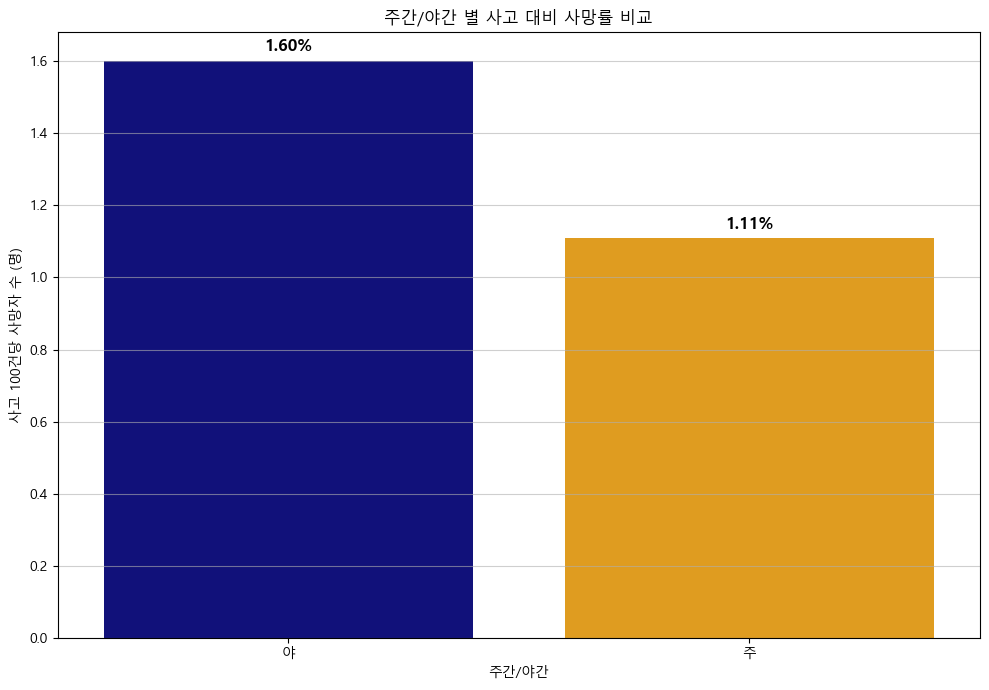

In [60]:
# 분석2. 주간, 야간 중 교통 사고 중에서 사망자가 많은 시기는?
plt.figure(figsize=(10, 7))
barplot = sns.barplot(x=day_night_stats.index, y='사고대비 사망률(%)', data=day_night_stats, palette=['darkblue', 'orange'])


plt.title('주간/야간 별 사고 대비 사망률 비교')
plt.xlabel('주간/야간')
plt.ylabel('사고 100건당 사망자 수 (명)')

plt.grid(axis='y', alpha=0.6)

# 막대 위에 값(수치) 표시
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',        # 표시할 텍스트
                     (p.get_x() + p.get_width() / 2., p.get_height()), # 텍스트 위치
                     ha = 'center', va = 'center',   # 정렬
                     xytext = (0, 10),               # 막대 상단에서 조금 위
                     textcoords = 'offset points',
                     fontsize=12,
                     fontweight='bold')

plt.tight_layout()
plt.show()


In [76]:
df.head()

,발생월,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,주,8682,98,2209,9440,759
1,1,야,5798,92,1539,6349,530
2,2,주,8056,95,2149,8710,710
3,2,야,5228,86,1419,5553,500
4,3,주,10393,109,2600,11132,880


In [78]:
# [분석 3] 주간사고의 사망자 비율이 가장 높은 발생월은?
df_day = df[df['주야']=='주'].copy()
df_day

,발생월,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,주,8682,98,2209,9440,759
2,2,주,8056,95,2149,8710,710
4,3,주,10393,109,2600,11132,880
6,4,주,10460,93,2797,11356,1055
8,5,주,11668,135,3132,12618,1178
10,6,주,10962,114,2881,11797,1092
12,7,주,10647,105,2755,11552,1138
14,8,주,11185,136,2990,12252,1111
16,9,주,11458,130,3063,12396,1119
18,10,주,11039,141,3186,11609,1102


In [79]:
monthly_day_stats = df_day.groupby('발생월')[['사고건수', '사망자수']].sum()

In [80]:
monthly_day_stats

,사고건수,사망자수
발생월,,
1,8682,98
2,8056,95
3,10393,109
4,10460,93
5,11668,135
6,10962,114
7,10647,105
8,11185,136
9,11458,130


In [81]:
monthly_day_stats['치사율(%)'] = monthly_day_stats['사망자수'] /monthly_day_stats['사고건수']
monthly_day_stats

,사고건수,사망자수,치사율(%)
발생월,,,
1,8682,98,0.011288
2,8056,95,0.011792
3,10393,109,0.010488
4,10460,93,0.008891
5,11668,135,0.011570
6,10962,114,0.010400
7,10647,105,0.009862
8,11185,136,0.012159
9,11458,130,0.011346


In [ ]:
# 치사율이 가장 높은 월(index)과 그 값을 찾기
highest_month = monthly_day_stats['치사율(%)'].idxmax()
highest_rate = monthly_day_stats['치사율(%)'].max()

In [86]:
print(highest_month)
print(highest_rate)

10
0.01277289609566084


- 추론결과: 
사고 건수: 5월, 9월, 10월, 11월 등 봄, 가을에 주간 사고가 집중됩니다. 이는 야외 활동 인구 및 교통량 증가와 관련이 깊습니다.

사망자 수: 8월부터 11월까지 하반기에 사망자 수가 집중되는 경향을 보입니다.

주/야 비교: 모든 월에서 주간 사고 건수가 야간보다 압도적으로 많습니다. (평균 약 1.8배)
하지만 사고의 치사율은 야간이 훨씬 높습니다.

추론: 야간 운전은 건수는 적지만 훨씬 더 치명적이다.
주간에는 교통량이 많아 접촉사고 등 경미한 사고가 잦지만, 야간에는 차량이 적어 과속하기 쉽고, 운전자 시야 확보가 어려워 한번 사고가 나면 대형사고로 이어질 확률이 높다고 추론할 수 있습니다.


# 가해운전자 법규위반별 주야별 교통사고 통계

In [146]:

df = pd.read_csv("../data/가해운전자 법규위반별 주야별 교통사고 통계.csv")
#기본 정보 확인
df.head()


,가해자법규위반,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,교차로 통행방법 위반,주,7699,25,1777,8901,769
1,교차로 통행방법 위반,야,3361,2,772,3923,351
2,기타,주,10871,111,3271,11461,1157
3,기타,야,5210,146,1548,5228,629
4,보행자 보호의무 위반,주,4483,73,1909,2588,132


In [147]:
# 교통사고의 주요원인 통계 분석

# '가해자법규위반'을 기준으로 데이터를 그룹화하고 각 수치를 합산합니다.
violation_group = df.groupby('가해자법규위반').sum(numeric_only=True)

In [148]:
violation_group

,사고건수,사망자수,중상자수,경상자수,부상신고자수
가해자법규위반,,,,,
교차로 통행방법 위반,11060,27,2549,12824,1120
기타,16081,257,4819,16689,1786
보행자 보호의무 위반,7227,98,2982,4326,265
신호위반,23444,199,8276,25932,1583
안전거리 미확보,22231,47,3749,29158,2590
안전운전 의무 불이행,110868,1754,27484,114076,11404
중앙선 침범,7385,169,3130,8564,493


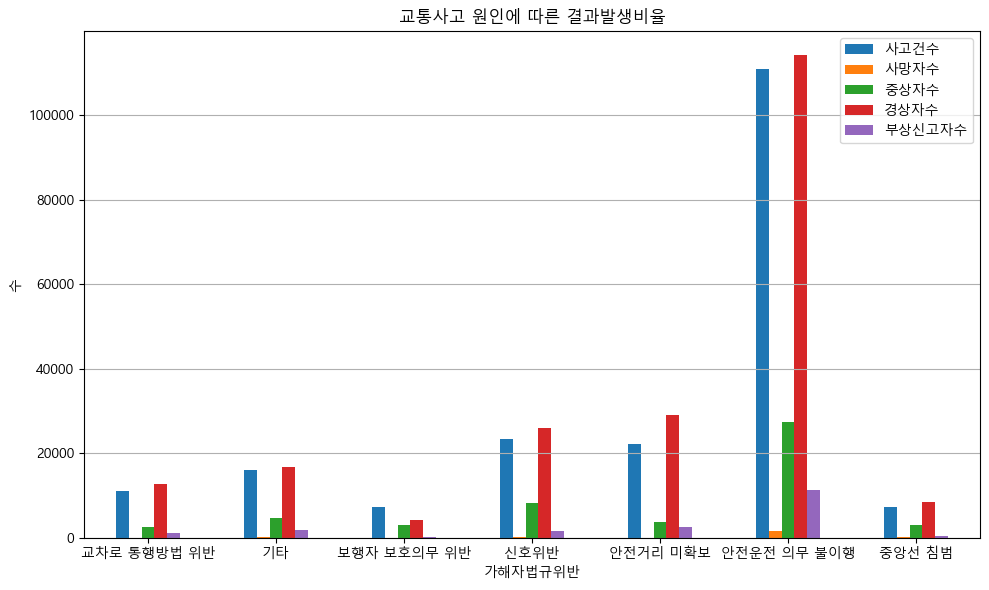

In [135]:
violation_group.plot(kind='bar', figsize=(10, 6))
plt.title("교통사고 원인에 따른 결과발생비율")
plt.ylabel("수")
plt.xticks(rotation=0)
plt.legend(title="")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [96]:
# 총 부상자수
violation_group['총부상자수'] = violation_group['중상자수'] + violation_group['경상자수'] + violation_group['부상신고자수']
violation_group


,사고건수,사망자수,중상자수,경상자수,부상신고자수,총부상자수
가해자법규위반,,,,,,
교차로 통행방법 위반,11060,27,2549,12824,1120,16493
기타,16081,257,4819,16689,1786,23294
보행자 보호의무 위반,7227,98,2982,4326,265,7573
신호위반,23444,199,8276,25932,1583,35791
안전거리 미확보,22231,47,3749,29158,2590,35497
안전운전 의무 불이행,110868,1754,27484,114076,11404,152964
중앙선 침범,7385,169,3130,8564,493,12187


In [98]:
# 전체 교통사고의 주범 분석
main_accidents = violation_group['사고건수'].idxmax()
main_fatalities = violation_group['사망자수'].idxmax()
main_total_injuries = violation_group['총부상자수'].idxmax()

print("--- 분석 결과 ---")
print(f"사고 건수 기준 주범: {main_accidents} (총 {violation_group.loc[main_accidents, '사고건수']:,}건)")
print(f"사망자 수 기준 주범: {main_fatalities} (총 {violation_group.loc[main_fatalities, '사망자수']:,}명)")
print(f"총 부상자 수 기준 주범: {main_total_injuries} (총 {violation_group.loc[main_total_injuries, '총부상자수']:,}명)")

--- 분석 결과 ---
사고 건수 기준 주범: 안전운전 의무 불이행 (총 110,868건)
사망자 수 기준 주범: 안전운전 의무 불이행 (총 1,754명)
총 부상자 수 기준 주범: 안전운전 의무 불이행 (총 152,964명)


# 가장 사고를 자주 일으키는 원인(빈도)과 가장 사망자를 많이 내는 원인(치명성)은 다르다.
- 법규 위반 유형별로 사고 건수와 치사율을 각각 계산하고 비교하여, 두 지표의 순위를 비교하여 증명


In [144]:
df.head()

,가해자법규위반,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,교차로 통행방법 위반,주,7699,25,1777,8901,769
1,교차로 통행방법 위반,야,3361,2,772,3923,351
2,기타,주,10871,111,3271,11461,1157
3,기타,야,5210,146,1548,5228,629
4,보행자 보호의무 위반,주,4483,73,1909,2588,132


In [ ]:
# 법규 위반 유형별로 주/야 데이터 합산
violation_summary = df.groupby('가해자법규위반')[['사고건수', '사망자수']].sum()

In [150]:
# 법규 위반 유형별 '치사율' 계산
violation_summary['치사율(%)'] = (violation_summary['사망자수'] / violation_summary['사고건수']) * 100
violation_summary

,사고건수,사망자수,치사율(%)
가해자법규위반,,,
교차로 통행방법 위반,11060,27,0.244123
기타,16081,257,1.598159
보행자 보호의무 위반,7227,98,1.356026
신호위반,23444,199,0.848831
안전거리 미확보,22231,47,0.211416
안전운전 의무 불이행,110868,1754,1.582062
중앙선 침범,7385,169,2.288422


In [ ]:
# 사고 건수 기준 내림차순 정렬 (가장 흔한 사고 원인 확인)
sorted_by_accidents = violation_summary.sort_values(by='사고건수', ascending=False)
sorted_by_accidents

,사고건수,사망자수,치사율(%)
가해자법규위반,,,
안전운전 의무 불이행,110868,1754,1.582062
신호위반,23444,199,0.848831
안전거리 미확보,22231,47,0.211416
기타,16081,257,1.598159
교차로 통행방법 위반,11060,27,0.244123
중앙선 침범,7385,169,2.288422
보행자 보호의무 위반,7227,98,1.356026


In [153]:
# 치사율 기준 내림차순 정렬 (가장 치명적인 사고 원인 확인)
sorted_by_fatality_rate = violation_summary.sort_values(by='치사율(%)', ascending=False)
sorted_by_fatality_rate

,사고건수,사망자수,치사율(%)
가해자법규위반,,,
중앙선 침범,7385,169,2.288422
기타,16081,257,1.598159
안전운전 의무 불이행,110868,1754,1.582062
보행자 보호의무 위반,7227,98,1.356026
신호위반,23444,199,0.848831
교차로 통행방법 위반,11060,27,0.244123
안전거리 미확보,22231,47,0.211416


- 가장 흔한 원인: **안전운전 의무 불이행**은 총 110,868건의 사고를 유발하여 가장 빈번한 사고 원인이었습니다. 이는 2위인 안전거리 미확보(22,231건)보다 약 5배나 많은 수치입니다.
- 가장 치명적인 원인:  **중앙선 침범**이 치사율 2.29%로 압도적인 1위를 차지했습니다. 사고 100건이 발생하면 약 2.3명이 사망한다는 의미입니다.
- 결론: 가장 흔한 원인인 안전운전 의무 불이행의 치사율(1.58%)도 낮지 않지만, 중앙선 침범의 치사율은 이보다 약 45% 더 높습니다. 따라서 **"가장 사고를 자주 일으키는 원인(빈도)과 가장 사망자를 많이 내는 원인(치명성)은 다르다"**는 최초의 추론은 타당합니다.